In [2]:
import numpy as np 
import pandas as pd

import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report , confusion_matrix , ConfusionMatrixDisplay, accuracy_score

import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [3]:
df = pd.read_csv(r"C:\Users\osame\OneDrive\Desktop\elevvo\task4\loan_approval_dataset.csv")
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [4]:
df.drop(columns=['loan_id'],inplace=True)

In [5]:
df.shape

(4269, 12)

In [6]:
df.describe()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [7]:
df.describe(include='object')

,education,self_employed,loan_status
count,4269,4269,4269
unique,2,2,2
top,Graduate,Yes,Approved
freq,2144,2150,2656


In [8]:
df.nunique()

no_of_dependents              6
education                     2
self_employed                 2
income_annum                 98
loan_amount                 378
loan_term                    10
cibil_score                 601
residential_assets_value    278
commercial_assets_value     188
luxury_assets_value         379
bank_asset_value            146
loan_status                   2
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0    no_of_dependents          4269 non-null   int64 
 1    education                 4269 non-null   object
 2    self_employed             4269 non-null   object
 3    income_annum              4269 non-null   int64 
 4    loan_amount               4269 non-null   int64 
 5    loan_term                 4269 non-null   int64 
 6    cibil_score               4269 non-null   int64 
 7    residential_assets_value  4269 non-null   int64 
 8    commercial_assets_value   4269 non-null   int64 
 9    luxury_assets_value       4269 non-null   int64 
 10   bank_asset_value          4269 non-null   int64 
 11   loan_status               4269 non-null   object
dtypes: int64(9), object(3)
memory usage: 400.3+ KB


In [10]:
df.isnull().sum()

no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

### no missing values

In [11]:
numeric_cols = df.select_dtypes(include='int64').columns
cat_cols = df.select_dtypes(include='object').columns

In [13]:

df.columns = df.columns.str.strip()

In [14]:
df['education'] = df['education'].str.strip()
df['self_employed'] = df['self_employed'].str.strip()
df['loan_status'] = df['loan_status'].str.strip()

In [15]:



df['loan_status'] = df['loan_status'].map({'Approved': 1, 'Rejected': 0})
df['education'] = df['education'].map({'Graduate': 0, 'Not Graduate': 1})
df['self_employed'] = df['self_employed'].map({'No': 0, 'Yes': 1})



In [16]:
df

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,0,1,1000000,2300000,12,317,2800000,500000,3300000,800000,0
4265,0,1,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000,1
4266,2,1,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000,0
4267,1,1,0,4100000,12800000,8,780,8200000,700000,14100000,5800000,1


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
numeric_cols = [
    'no_of_dependents',
    'income_annum',
    'loan_amount',
    'loan_term',
    'cibil_score',
    'residential_assets_value',
    'commercial_assets_value',
    'luxury_assets_value',
    'bank_asset_value'
]

scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

df.head()


,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,-0.294102,0,0,1.617979,1.633052,0.192617,1.032792,-0.780058,2.877289,0.832028,0.930304,1
1,-1.473548,1,1,-0.341750,-0.324414,-0.508091,-1.061051,-0.733924,-0.631921,-0.694993,-0.515936,0
2,0.295621,0,0,1.439822,1.610933,1.594031,-0.544840,-0.057300,-0.107818,1.996520,2.407316,0
3,0.295621,0,0,1.119139,1.721525,-0.508091,-0.771045,1.649637,-0.381263,0.897943,0.899533,0
4,1.475067,1,1,1.689242,1.002681,1.594031,-1.264055,0.757724,0.735304,1.568075,0.007172,0


In [18]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


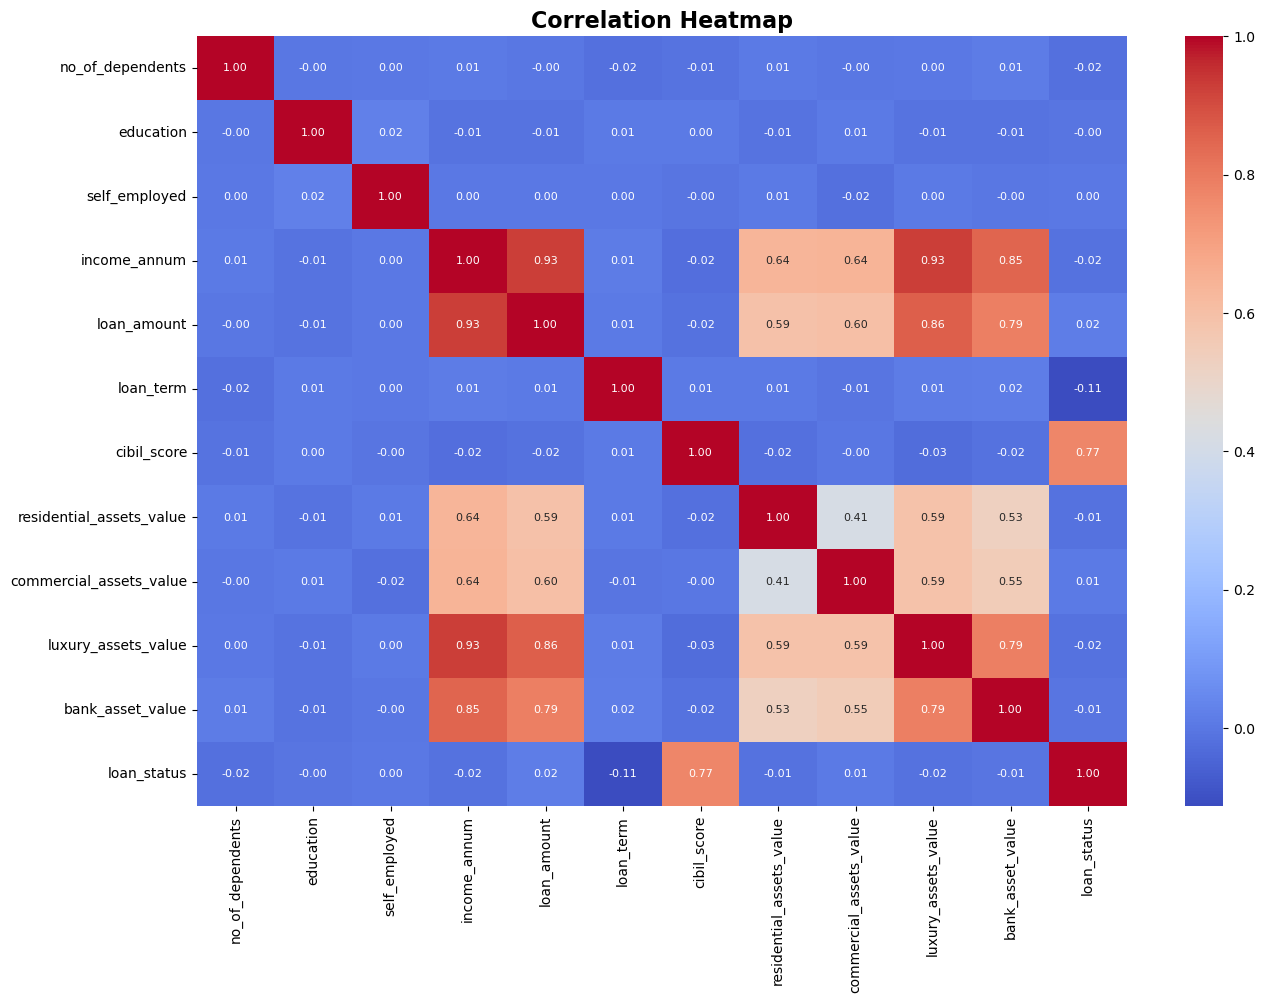

In [23]:
correlation = df.corr(numeric_only=True)
plt.figure(figsize=(15,10))
sns.heatmap(correlation, 
            cmap="coolwarm",  # diverging color map
            cbar=True, 
            fmt=".2f", 
            annot=True, 
            annot_kws={"size":8})  # smaller numbers for clarity
plt.title("Correlation Heatmap", fontsize=16, weight="bold")
plt.show()


loan_status
1    2656
0    1613
Name: count, dtype: int64

In [24]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,-0.294102,0,0,1.617979,1.633052,0.192617,1.032792,-0.780058,2.877289,0.832028,0.930304,1
1,-1.473548,1,1,-0.341750,-0.324414,-0.508091,-1.061051,-0.733924,-0.631921,-0.694993,-0.515936,0
2,0.295621,0,0,1.439822,1.610933,1.594031,-0.544840,-0.057300,-0.107818,1.996520,2.407316,0
3,0.295621,0,0,1.119139,1.721525,-0.508091,-0.771045,1.649637,-0.381263,0.897943,0.899533,0
4,1.475067,1,1,1.689242,1.002681,1.594031,-1.264055,0.757724,0.735304,1.568075,0.007172,0


In [27]:
from sklearn.model_selection import train_test_split
x = df.drop(columns=['loan_status'])
y = df['loan_status']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=4)


handling imbalance

In [30]:
df['loan_status'].value_counts()

loan_status
1    2656
0    1613
Name: count, dtype: int64

In [31]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(x_train, y_train)


print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_res.value_counts())

Before SMOTE: loan_status
1    2110
0    1305
Name: count, dtype: int64
After SMOTE: loan_status
0    2110
1    2110
Name: count, dtype: int64


In [ ]:
import time
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier


models = {
    "Logistic Regression": LogisticRegression(
        multi_class="multinomial", solver="lbfgs", max_iter=1000, random_state=42
    ),
    "Random Forest": RandomForestClassifier(
        n_estimators=200, random_state=42, n_jobs=-1
    ),
    "Gradient Boosting": GradientBoostingClassifier(
        n_estimators=200, random_state=42
    ),
    "XGBoost": XGBClassifier(
        use_label_encoder=False, eval_metric="logloss", n_estimators=300, random_state=42
    )
}

results = {}


for name, model in models.items():
    start = time.time()
    
    model.fit(X_train_res, y_train_res)   
    y_pred = model.predict(x_test)       
    
    acc = accuracy_score(y_test, y_pred)
    duration = time.time() - start
    report = classification_report(y_test, y_pred)
    
    print(f"\n{name}")
    print(f"Accuracy: {acc:.4f}")
    print(f"Training + Prediction time: {duration:.2f} sec")
    print("Classification Report:")
    print(report)
    
    results[name] = {
        "Accuracy": acc,
        "Time (s)": duration,
        "Report": report
    }



Logistic Regression
Accuracy: 0.9239
Training + Prediction time: 0.04 sec
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       308
           1       0.96      0.92      0.94       546

    accuracy                           0.92       854
   macro avg       0.91      0.93      0.92       854
weighted avg       0.93      0.92      0.92       854


Random Forest
Accuracy: 0.9824
Training + Prediction time: 0.67 sec
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       308
           1       0.99      0.99      0.99       546

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854


Gradient Boosting
Accuracy: 0.9789
Training + Prediction time: 2.30 sec
Classification Report:
              precision    recall  f1-score   support

     

xgboost showed best accuracy/time ratio